In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from bin.utils import iterate_fasta
from abnumber import Chain, Position, Alignment
import json
import numpy as np

In [13]:
records = [r for r in iterate_fasta('../../data/germlines/imgt_human_variable_germlines.fa') if 'partial' not in r.description]
len(records)

629

In [14]:
records[0]

SeqRecord(seq=Seq('....APTKAPDVFPIISGCRHPKD..NSPVVLACLITGYHP..TSVTVTWYMGT...RWP'), id='K02875|IGHD*01|Homo', name='K02875|IGHD*01|Homo', description='K02875|IGHD*01|Homo sapiens_Chronic lymphotic leukemia (CLL)  patient|F|CH1|g,101..402|303 nt|1|+1|-1| |101 AA|101+24=125| | |', dbxrefs=[])

In [20]:
def v_gene_to_dict(record):
    seq = str(record.seq)
    result = {i+1: aa if aa not in '.*' else '-' for i, aa in enumerate(seq)}
    result['id'] = record.id.split('|')[1]
    return result

def j_gene_to_dict(record, end):
    seq = str(record.seq)
    result = {end-i: aa if aa not in '.*' else '-' for i, aa in enumerate(seq[::-1])}
    result['id'] = record.id.split('|')[1]
    return result

In [21]:
ighv = pd.DataFrame([v_gene_to_dict(r) for r in records if r.id.split('|')[1].startswith('IGHV')]).fillna('-').set_index('id', verify_integrity=True)
ighv = ighv.sort_index(axis=1).add_prefix('H')
ighv = ighv.loc[:,~(ighv == '-').all()]
print(ighv.shape)
with pd.option_context('display.max_columns', 200):
    display(ighv.head())

(338, 103)


,H1,H2,H3,H4,H5,H6,H7,H8,H9,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24,H25,H26,H27,H28,H29,H30,H31,H34,H35,H36,H37,H38,H39,H40,H41,H42,H43,H44,H45,H46,H47,H48,H49,H50,H51,H52,H53,H54,H55,H56,H57,H58,H59,H60,H61,H62,H63,H64,H65,H66,H67,H68,H69,H70,H71,H72,H74,H75,H76,H77,H78,H79,H80,H81,H82,H83,H84,H85,H86,H87,H88,H89,H90,H91,H92,H93,H94,H95,H96,H97,H98,H99,H100,H101,H102,H103,H104,H105,H106,H107
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
IGHV1-18*01,Q,V,Q,L,V,Q,S,G,A,E,V,K,K,P,G,A,S,V,K,V,S,C,K,A,S,G,Y,T,F,-,-,T,S,Y,G,I,S,W,V,R,Q,A,P,G,Q,G,L,E,W,M,G,W,I,S,A,Y,-,-,N,G,N,T,N,Y,A,Q,K,L,Q,G,R,V,T,M,T,T,D,T,S,T,S,T,A,Y,M,E,L,R,S,L,R,S,D,D,T,A,V,Y,Y,C,A,R,-
IGHV1-18*03,Q,V,Q,L,V,Q,S,G,A,E,V,K,K,P,G,A,S,V,K,V,S,C,K,A,S,G,Y,T,F,-,-,T,S,Y,G,I,S,W,V,R,Q,A,P,G,Q,G,L,E,W,M,G,W,I,S,A,Y,-,-,N,G,N,T,N,Y,A,Q,K,L,Q,G,R,V,T,M,T,T,D,T,S,T,S,T,A,Y,M,E,L,R,S,L,R,S,D,D,M,A,V,Y,Y,C,A,R,-
IGHV1-18*04,Q,V,Q,L,V,Q,S,G,A,E,V,K,K,P,G,A,S,V,K,V,S,C,K,A,S,G,Y,T,F,-,-,T,S,Y,G,I,S,W,V,R,Q,A,P,G,Q,G,L,E,W,M,G,W,I,S,A,Y,-,-,N,G,N,T,N,Y,A,Q,K,L,Q,G,R,V,T,M,T,T,D,T,S,T,S,T,A,Y,M,E,L,R,S,L,R,S,D,D,T,A,V,Y,Y,C,A,R,-
IGHV1-2*01,Q,V,Q,L,V,Q,S,G,A,E,V,K,K,P,G,A,S,V,K,V,S,C,K,A,S,G,Y,T,F,-,-,T,G,Y,Y,M,H,W,V,R,Q,A,P,G,Q,G,L,E,W,M,G,R,I,N,P,N,-,-,S,G,G,T,N,Y,A,Q,K,F,Q,G,R,V,T,S,T,R,D,T,S,I,S,T,A,Y,M,E,L,S,R,L,R,S,D,D,T,V,V,Y,Y,C,A,R,-
IGHV1-2*02,Q,V,Q,L,V,Q,S,G,A,E,V,K,K,P,G,A,S,V,K,V,S,C,K,A,S,G,Y,T,F,-,-,T,G,Y,Y,M,H,W,V,R,Q,A,P,G,Q,G,L,E,W,M,G,W,I,N,P,N,-,-,S,G,G,T,N,Y,A,Q,K,F,Q,G,R,V,T,M,T,R,D,T,S,I,S,T,A,Y,M,E,L,S,R,L,R,S,D,D,T,A,V,Y,Y,C,A,R,-


In [22]:
ighj = pd.DataFrame([j_gene_to_dict(r, end=128) for r in records if r.id.split('|')[1].startswith('IGHJ')]).fillna('-').set_index('id', verify_integrity=True)
print(len(ighj))
ighj = ighj.sort_index(axis=1).add_prefix('H')
ighj = ighj.rename(columns={
    'H111': 'H112A',
    'H110': 'H112B',
    'H109': 'H112C',
})
ighj

11


,H112C,H112B,H112A,H112,H113,H114,H115,H116,H117,H118,H119,H120,H121,H122,H123,H124,H125,H126,H127,H128
id,,,,,,,,,,,,,,,,,,,,
IGHJ1*01,-,-,-,A,E,Y,F,Q,H,W,G,Q,G,T,L,V,T,V,S,S
IGHJ2*01,-,-,-,Y,W,Y,F,D,L,W,G,R,G,T,L,V,T,V,S,S
IGHJ3*01,-,-,-,-,D,A,F,D,V,W,G,Q,G,T,M,V,T,V,S,S
IGHJ3*02,-,-,-,-,D,A,F,D,I,W,G,Q,G,T,M,V,T,V,S,S
IGHJ4*01,-,-,-,-,-,Y,F,D,Y,W,G,Q,G,T,L,V,T,V,S,S
IGHJ4*02,-,-,-,-,-,Y,F,D,Y,W,G,Q,G,T,L,V,T,V,S,S
IGHJ4*03,-,-,-,-,-,Y,F,D,Y,W,G,Q,G,T,L,V,T,V,S,S
IGHJ5*01,-,-,-,-,N,W,F,D,S,W,G,Q,G,T,L,V,T,V,S,S
IGHJ5*02,-,-,-,-,N,W,F,D,P,W,G,Q,G,T,L,V,T,V,S,S


In [23]:
iglv = pd.DataFrame([v_gene_to_dict(r) for r in records if r.id.split('|')[1].startswith('IGLV')]).fillna('-').set_index('id', verify_integrity=True)
iglv = iglv.sort_index(axis=1).add_prefix('L')
iglv = iglv.loc[:,~(iglv == '-').all()]
print(iglv.shape)
iglv = iglv.rename(columns={
    'L112': 'L111A',
    'L113': 'L111B',
    'L114': 'L111C',
    'L115': 'L111D',
    'L116': 'L111E',
})
iglv.head()

(93, 108)


,L1,L2,L3,L4,L5,L6,L7,L8,L9,L11,...,L106,L107,L108,L109,L110,L111,L111A,L111B,L111C,L111D
id,,,,,,,,,,,,,,,,,,,,,
IGLV1-36*01,Q,S,V,L,T,Q,P,P,S,V,...,A,W,D,D,S,L,N,G,-,-
IGLV1-40*01,Q,S,V,L,T,Q,P,P,S,V,...,S,Y,D,S,S,L,S,G,-,-
IGLV1-40*02,Q,S,V,V,T,Q,P,P,S,V,...,S,Y,D,S,S,L,S,G,-,-
IGLV1-40*03,Q,S,V,V,T,Q,P,P,S,V,...,S,Y,D,S,S,L,S,G,-,-
IGLV1-41*01,Q,S,V,L,T,Q,P,P,S,V,...,A,W,D,T,S,P,R,A,-,-


In [24]:
iglj = pd.DataFrame([j_gene_to_dict(r, end=127) for r in records if (r.id.split('|')[1].startswith('IGLJ')) and 'IGLJ-C/OR18*01' not in r.id]).fillna('-').set_index('id', verify_integrity=True)
print(len(iglj))
iglj = iglj.sort_index(axis=1).add_prefix('L')
iglj

10


,L116,L117,L118,L119,L120,L121,L122,L123,L124,L125,L126,L127
id,,,,,,,,,,,,
IGLJ1*01,Y,V,F,G,T,G,T,K,V,T,V,L
IGLJ2*01,V,V,F,G,G,G,T,K,L,T,V,L
IGLJ3*01,V,V,F,G,G,G,T,K,L,T,V,L
IGLJ3*02,W,V,F,G,G,G,T,K,L,T,V,L
IGLJ4*01,F,V,F,G,G,G,T,Q,L,I,I,L
IGLJ5*01,W,V,F,G,E,G,T,E,L,T,V,L
IGLJ5*02,W,V,F,G,E,G,T,E,L,T,V,L
IGLJ6*01,N,V,F,G,S,G,T,K,V,T,V,L
IGLJ7*01,A,V,F,G,G,G,T,Q,L,T,V,L


In [25]:
igkv = pd.DataFrame([v_gene_to_dict(r) for r in records if r.id.split('|')[1].startswith('IGKV')]).fillna('-').set_index('id', verify_integrity=True)
igkv = igkv.sort_index(axis=1).add_prefix('L')
igkv = igkv.loc[:,~(igkv == '-').all()]
print(igkv.shape)
igkv = igkv.rename(columns={
    'L112': 'L111A',
    'L113': 'L111B',
    'L114': 'L111C',
    'L115': 'L111D',
    'L116': 'L111E',
})
igkv.head()

(106, 102)


,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,...,L103,L104,L105,L106,L107,L108,L109,L110,L111,L111A
id,,,,,,,,,,,,,,,,,,,,,
IGKV1-12*01,D,I,Q,M,T,Q,S,P,S,S,...,Y,C,Q,Q,A,N,S,F,P,-
IGKV1-12*02,D,I,Q,M,T,Q,S,P,S,S,...,Y,C,Q,Q,A,N,S,F,P,-
IGKV1-13*01,A,I,Q,L,T,Q,S,P,S,S,...,Y,C,Q,Q,F,N,N,Y,P,-
IGKV1-13*02,A,I,Q,L,T,Q,S,P,S,S,...,Y,C,Q,Q,F,N,S,Y,P,-
IGKV1-16*01,D,I,Q,M,T,Q,S,P,S,S,...,Y,C,Q,Q,Y,N,S,Y,P,-


In [26]:
igkj = pd.DataFrame([j_gene_to_dict(r, end=127) for r in records if (r.id.split('|')[1].startswith('IGKJ')) and 'igkj-C/OR18*01' not in r.id]).fillna('-').set_index('id', verify_integrity=True)
print(len(igkj))
igkj = igkj.sort_index(axis=1).add_prefix('L')
igkj

9


,L116,L117,L118,L119,L120,L121,L122,L123,L124,L125,L126,L127
id,,,,,,,,,,,,
IGKJ1*01,W,T,F,G,Q,G,T,K,V,E,I,K
IGKJ2*01,Y,T,F,G,Q,G,T,K,L,E,I,K
IGKJ2*02,C,T,F,G,Q,G,T,K,L,E,I,K
IGKJ2*03,Y,S,F,G,Q,G,T,K,L,E,I,K
IGKJ2*04,C,S,F,G,Q,G,T,K,L,E,I,K
IGKJ3*01,F,T,F,G,P,G,T,K,V,D,I,K
IGKJ4*01,L,T,F,G,G,G,T,K,V,E,I,K
IGKJ4*02,L,T,F,G,G,G,T,K,V,E,I,K
IGKJ5*01,I,T,F,G,Q,G,T,R,L,E,I,K


# Save

In [110]:
print('ighv', len(ighv), len(ighv.drop_duplicates()))
print('ighj', len(ighj), len(ighj.drop_duplicates()))
print('iglv', len(iglv), len(iglv.drop_duplicates()))
print('iglj', len(iglj), len(iglj.drop_duplicates()))
print('igkv', len(igkv), len(igkv.drop_duplicates()))
print('igkj', len(igkj), len(igkj.drop_duplicates()))

ighv 338 259
ighj 11 9
iglv 93 85
iglj 10 8
igkv 106 87
igkj 9 8


In [61]:
def to_dict(df):
    return {
        'positions': df.columns.values.tolist(),
        'sequences': df.apply(''.join, axis=1).to_dict()
    }

In [111]:
with open('../../data/germlines/imgt_human_ig.json', 'wt') as f:
    json.dump({
        'ighv': to_dict(ighv),
        'ighj': to_dict(ighj),
        'iglv': to_dict(iglv),
        'iglj': to_dict(iglj),
        'igkv': to_dict(igkv),
        'igkj': to_dict(igkj),
    }, f, indent=2)

# Example

In [14]:
vh = Chain('QVQLVQSGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDYRFDMGFDYWGQGTTVTVSS', 'imgt')
vh

QVQLVQSGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDYRFDMGFDYWGQGTTVTVSS
                         ^^^^^^^^                 ^^^^^^^^                                      ^^^^^^^^^^^^^           

In [17]:
print(vh.format_tall(5))

       H1 Q          H26 S          H54 G          H81 D    CDR3 H105 A
       H2 V     CDR1 H27 G          H55 G          H82 S    CDR3 H106 R
       H3 Q     CDR1 H28 Y     CDR2 H56 I          H83 S    CDR3 H107 R
       H4 L     CDR1 H29 T     CDR2 H57 N          H84 T    CDR3 H108 D
       H5 V     CDR1 H30 F     CDR2 H58 P          H85 T    CDR3 H109 Y
       H6 Q     CDR1 H35 T     CDR2 H59 S          H86 T    CDR3 H110 R
       H7 S     CDR1 H36 N     CDR2 H62 N          H87 A    CDR3 H111 F
       H8 G     CDR1 H37 Y     CDR2 H63 G          H88 Y    CDR3 H112 D
       H9 V     CDR1 H38 Y     CDR2 H64 G          H89 M    CDR3 H113 M
      H11 E          H39 M     CDR2 H65 T          H90 E    CDR3 H114 G
      H12 V          H40 Y          H66 N          H91 L    CDR3 H115 F
      H13 K          H41 W          H67 F          H92 K    CDR3 H116 D
      H14 K          H42 V          H68 N          H93 S    CDR3 H117 Y
      H15 P          H43 R          H69 E          H94 L        

In [20]:
vl = Chain('EIVLTQSPATLSLSPGERATLSCRASKGVSTSGYSYLHWYQQKPGQAPRLLIYLASYLESGVPARFSGSGSGTDFTLTISSLEPEDFAVYYCQHSRDLPLTFGGGTKVEIK', 'imgt')
vl

EIVLTQSPATLSLSPGERATLSCRASKGVSTSGYSYLHWYQQKPGQAPRLLIYLASYLESGVPARFSGSGSGTDFTLTISSLEPEDFAVYYCQHSRDLPLTFGGGTKVEIK
                          ^^^^^^^^^^                 ^^^                                    ^^^^^^^^^          

In [22]:
print(vl.format_tall(5))

       L1 E          L24 R          L49 A          L80 G    CDR3 L105 Q
       L2 I          L25 A          L50 P          L83 S    CDR3 L106 H
       L3 V          L26 S          L51 R          L84 G    CDR3 L107 S
       L4 L     CDR1 L27 K          L52 L          L85 T    CDR3 L108 R
       L5 T     CDR1 L28 G          L53 L          L86 D    CDR3 L109 D
       L6 Q     CDR1 L29 V          L54 I          L87 F    CDR3 L114 L
       L7 S     CDR1 L30 S          L55 Y          L88 T    CDR3 L115 P
       L8 P     CDR1 L31 T     CDR2 L56 L          L89 L    CDR3 L116 L
       L9 A     CDR1 L34 S     CDR2 L57 A          L90 T    CDR3 L117 T
      L10 T     CDR1 L35 G     CDR2 L65 S          L91 I         L118 F
      L11 L     CDR1 L36 Y          L66 Y          L92 S         L119 G
      L12 S     CDR1 L37 S          L67 L          L93 S         L120 G
      L13 L     CDR1 L38 Y          L68 E          L94 L         L121 G
      L14 S          L39 L          L69 S          L95 E        

In [103]:
germline.align(vh)

QVQLVQSGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLEWMGWISAYNGNTNYAQKLQGRVTMTTDTSTSTAYMELRSLRSDDTAVYYCAR----------------------
||||||||.|||||||||||||||||||||+|.+.||||||||||||||.|+..||.||+.+|.+.|||+|||+||+||||||+||+.||||||||||......................
QVQLVQSGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDYRFDMGFDYWGQGTTVTVSS
                         ^^^^^^^^                 ^^^^^^^^                                      ^^^^^^^^^^^^^           

In [37]:
def most_similar_heatmap(ig, chain, figsize=(24, 3)):
    chain_aas = pd.Series([chain.positions.get(chain._parse_position(pos), '-') for pos in ig.columns], ig.columns)
    chain_aas.name = 'Query'
    most_similar = (chain_aas == ig) & (chain_aas != '-')
    most_similar = most_similar.loc[most_similar.sum(axis=1).sort_values(ascending=False)[:10].index]
    annot = ig.loc[most_similar.index]
    most_similar = pd.concat([pd.DataFrame([pd.Series(1.2, index=chain_aas.index, name=chain_aas.name)]), most_similar])
    annot = pd.concat([pd.DataFrame([chain_aas]), annot])
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(most_similar, annot=annot, fmt='s', ax=ax);

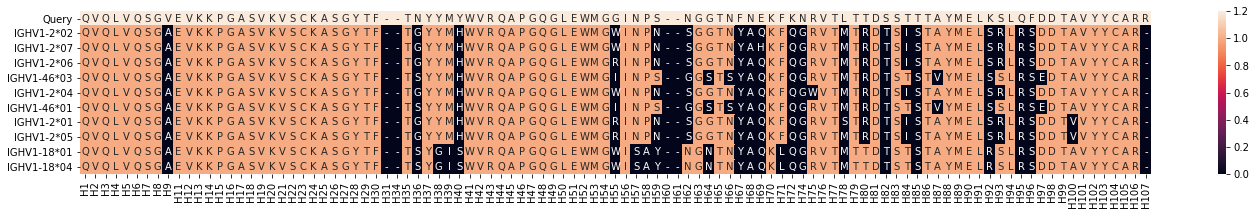

In [38]:
most_similar_heatmap(ighv, vh)

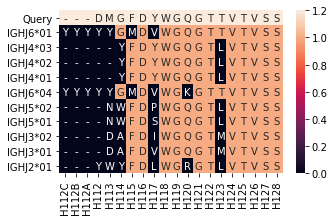

In [41]:
most_similar_heatmap(ighj, vh, figsize=(5, 3))

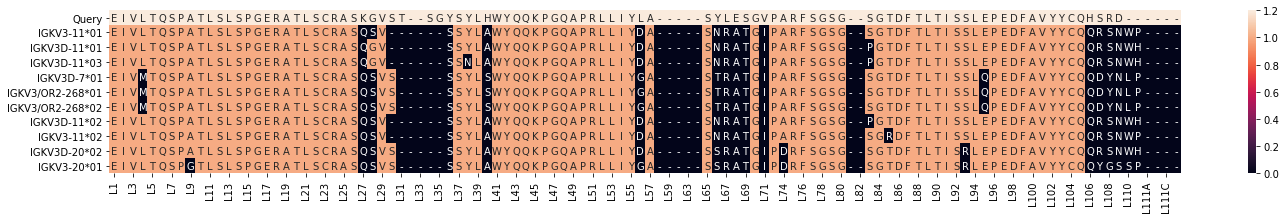

In [42]:
most_similar_heatmap(iglv, vl)

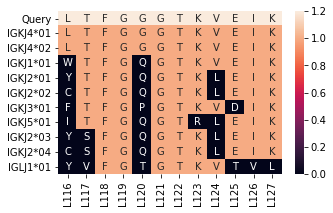

In [43]:
most_similar_heatmap(iglj, vl, figsize=(5, 3))